In [36]:
import numpy as np
import pandas as pd
import scipy as sp
import scipy.io
import os
import matplotlib.pyplot as plt

os.chdir('C:/Users/L/Desktop/Vasilis\Work/UC Berkeley/Courses/Fall 2017/Data-X/Project/Project depository/cartilage-x/edema')
print (os.getcwd())

C:\Users\L\Desktop\Vasilis\Work\UC Berkeley\Courses\Fall 2017\Data-X\Project\Project depository\cartilage-x\edema


In [37]:
mris = [f for f in os.listdir('../../mri/') ]

segs = [f for f in os.listdir('../../seg/') ]
segs

#len(mris)

['AFACL2005_01.mat',
 'AFACL2006_01.mat',
 'AFACL2007_01.mat',
 'AFACL2008_01.mat',
 'AFACL2009_01.mat',
 'AFACL2011_01.mat',
 'AFACL2012_01.mat',
 'AFACL2013_01.mat',
 'AFACL2014_01.mat',
 'AFACL2015_01.mat',
 'AFACL2016_01.mat',
 'AFACL2017_01.mat',
 'AFACL2018_01.mat',
 'AFACL2019_01.mat',
 'AFACL2020_01.mat',
 'AFACL2021_01.mat',
 'AFACL2022_01.mat',
 'AFACL3001_01.mat',
 'AFACL3002_01.mat',
 'AFACL3003_01.mat',
 'AFACL3005_01.mat',
 'AFACL3006_01.mat',
 'AFACL3007_01.mat',
 'AFACL3008_01.mat']

In [38]:
print(os.getcwd())
mri={}
seg={}

for i in range(len(mris)):

    mri[mris[i]] = scipy.io.loadmat('../../mri/' + mris[i])['im_store']

    seg[segs[i]] = scipy.io.loadmat('../../seg/' + segs[i])['pred_con_vol']

C:\Users\L\Desktop\Vasilis\Work\UC Berkeley\Courses\Fall 2017\Data-X\Project\Project depository\cartilage-x\edema


In [39]:
def parametrize():
    
    return([mri[mris[i]][:,:,80].ravel() for i in range(len(mris))])

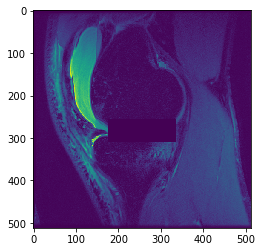

In [55]:
#plt.imshow(mri[mris[0]][:,:,80])
plt.show()
x=mri[mris[0]][:,:,80]
#x[10:20,40:100]=0
y=seg[segs[0]][:,:,80]
z=(np.nonzero(y))
x_min=min(z[0])
x_max=max(z[0])
y_min=min(z[1])
y_max=max(z[1])
x[x_min:x_max,y_min:y_max]=0
plt.imshow(x)
plt.show()
mri[mris[0]][:,:,80].ravel()

pd_mri80 = pd.DataFrame([(mri[mris[i]][x_min:x_max,y_min:y_max,80]).ravel() for i in range(len(mris))])

In [100]:
# Find the line
x=(mri[mris[0]][:,:,80])
y=np.amax(seg[segs[0]],2)
#x(y>4)
# y.unique()
df_x=pd.DataFrame(x)
df_y=pd.DataFrame(y)
plt.plot(x[y>4][0],x[y>4][1])
df_x[df_y>4]
x[y[y] > 4]
x[y]
#B = ind[A[ind]==value]
#plt.show()
#y2 = seg[segs[0]][:,:,80]
#set(y2.ravel())

IndexError: arrays used as indices must be of integer (or boolean) type

In [41]:
def get_crop_size(matrix):
    x = np.shape(matrix)[1]
    y = np.shape(matrix)[0]
    length_before_edge = 0
    edges = []
    
    for i in range(x):
        for j in range(y):
            if matrix[i][j] == True:
#                 edges.append((i, j, length_before_edge))
                edges.append(length_before_edge)
                length_before_edge = 0
                break
            length_before_edge += 1
        length_before_edge = 0
#         edges.append((i, i, length_before_edge))
    return max(edges)

In [42]:
pd_mri80['ID']=[mris[i] for i in range(len(mris))]
pd_mri80=pd_mri80.set_index(pd_mri80['ID']).drop('ID', axis=1)
pd_mri80['Y']=[3,3,2,3,1,3,3,1,3,0,2,0,3,0,0,1,2,3,0,0,2,0,3,3]
#len([3,3,2,3,1,3,31,3,0,2,0,3,0,0,1,2,3,0,2,0,3,0])
pd_mri80

,0,1,2,3,4,5,6,7,8,9,...,8577,8578,8579,8580,8581,8582,8583,8584,8585,Y
ID,,,,,,,,,,,,,,,,,,,,,
AFACL2005_01.mat,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3
AFACL2006_01.mat,0.154646,0.361598,0.510396,0.456465,0.344055,0.331709,0.390188,0.405458,0.346329,0.280702,...,0.061404,0.069201,0.068551,0.058480,0.057505,0.093892,0.165042,0.246264,0.287849,3
AFACL2007_01.mat,0.355678,0.390823,0.435080,0.483567,0.554507,0.607875,0.628376,0.644972,0.654409,0.662870,...,0.055646,0.080377,0.084608,0.081354,0.092092,0.087211,0.046860,0.037423,0.072242,2
AFACL2008_01.mat,0.258859,0.286949,0.299481,0.311150,0.331029,0.406223,0.541487,0.637424,0.624892,0.585566,...,0.050562,0.097234,0.090320,0.038462,0.010372,0.020743,0.070009,0.104149,0.091184,3
AFACL2009_01.mat,0.038721,0.064385,0.094552,0.106258,0.099955,0.090950,0.135074,0.297163,0.517335,0.650158,...,0.128771,0.107159,0.060333,0.027015,0.038271,0.108960,0.124268,0.080144,0.064836,1
AFACL2011_01.mat,0.036515,0.026392,0.026392,0.014100,0.011931,0.024584,0.022777,0.021692,0.024946,0.018800,...,0.124367,0.132321,0.141721,0.152567,0.160882,0.167751,0.166667,0.173897,0.215835,3
AFACL2012_01.mat,0.079365,0.088657,0.064654,0.042973,0.043748,0.043360,0.021680,0.020132,0.029036,0.018970,...,0.025165,0.014712,0.014324,0.012002,0.019744,0.024777,0.024003,0.031359,0.021680,3
AFACL2013_01.mat,0.118997,0.103272,0.098173,0.088398,0.044199,0.007225,0.032299,0.073948,0.070548,0.058649,...,0.124947,0.061623,0.014875,0.005950,0.006800,0.010625,0.014025,0.029324,0.038674,1
AFACL2014_01.mat,0.011912,0.016494,0.028711,0.019243,0.012523,0.028406,0.028711,0.025351,0.038790,0.059255,...,0.018326,0.007636,0.021686,0.018937,0.011301,0.014050,0.046426,0.083995,0.087660,3


In [43]:
X=pd_mri80.iloc[:,:-1]
Y=pd_mri80['Y']

In [44]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.15, random_state=100)
print ('Number of samples in training data:',len(x_train))
print ('Number of samples in validation data:',len(x_test))


Number of samples in training data: 20
Number of samples in validation data: 4


In [45]:
from sklearn import linear_model

#Name our regression object
Edema_reg_model = linear_model.LogisticRegression(C=1e5)
# we create an instance of Neighbours Classifier and fit the data.

print ('Training a logistic Regression Model..')
Edema_reg_model.fit(x_train, y_train)

Training a logistic Regression Model..


LogisticRegression(C=100000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [46]:
#Training Accuracy

training_accuracy=Edema_reg_model.score(x_train,y_train)
print ('Training Accuracy:',training_accuracy)


Training Accuracy: 1.0


In [47]:
validation_accuracy=Edema_reg_model.score(x_test,y_test)
print('Accuraacy of the model on unseen validation data: ',validation_accuracy)

#from sklearn.metrics import confusion_matrix
#y_true = y_test
#y_pred = Edem_reg_model.predict(x_test)
#cf=pd.DataFrame(confusion_matrix(y_true, y_pred),columns=['Pred 0',1,2],index=['Act 0',1,2])
#print ('Confusion matrix of test data is: \n',cf)

Accuraacy of the model on unseen validation data:  1.0


In [48]:
#The regression approach

from sklearn.linear_model import Ridge

from sklearn.linear_model import LinearRegression

In [49]:
Edema_linear_model=linear_model.Ridge()
Edema_linear_model.fit(x_train,y_train)
training_accuracy_reg=Edema_linear_model.score(x_train,y_train)
print ('Training reg accuracy', training_accuracy_reg)

validation_accuracy=Edema_linear_model.score(x_test,y_test)
print('Accuraacy of the model on unseen validation data: ',validation_accuracy)

Training reg accuracy 0.98583131664
Accuraacy of the model on unseen validation data:  0.512454116955


##  Summarize
### 24 mri samples and matched them the bme score and we performed the mean and slice and max intensity and we didnt get the best results.
## Questions
### 1)What about feature selection. Do you have any suggestion on creating more or selecting features. (Creating as taking the mean of an area and selecting as taking a specific area of the picture) 
### 2)Algorithms, whichever gave us a better estimators.
### 3)How to detect which portion is relevant + how to scale the cropped image
### 4)If we come up with the correect segmentation I think we would be good to go

In [50]:
os.getcwd()

'C:\\Users\\L\\Desktop\\Vasilis\\Work\\UC Berkeley\\Courses\\Fall 2017\\Data-X\\Project\\Project depository\\cartilage-x\\edema'

In [51]:
bme=pd.read_excel('../../master_BME.xlsx')

In [52]:
#bme.iloc[::3,:]
bme

,participant_id,BME
0,AF_1001_baseline_mfc,3
1,AF_1001_6_month_mfc,0
2,AF_1001_1_year_mfc,0
3,AF_1002_baseline_mfc,0
4,AF_1002_6_month_mfc,1
5,AF_1002_1_year_mfc,1
6,AF_1003_baseline_mfc,0
7,AF_1003_6_month_mfc,0
8,AF_1003_1_year_mfc,0
9,AF_1004_baseline_mfc,0


In [53]:
# get the median index out of the indexes that have segmentation

def get_indicies(matrix):
    z_len = np.shape(matrix)[2]
    indicies = []
    for i in range(z_len):
        slice = matrix[:,:,max(0, i - 1):i]
        slice = np.sum(slice)
        if slice != 0:
#             print('z index = {0}     slice sum = {1}'.format(i, slice))
            indicies.append(i)
    return (min(indicies), max(indicies))
    

In [54]:
z1, z2 = get_indicies(seg_im)

NameError: name 'seg_im' is not defined

In [ ]:
z_slice = (z1 + z2) // 3

In [ ]:
np.shape(mri_2d)

In [ ]:
plt.imshow(mri_2d)
plt.show()